# ASSIGNMENT_3
# "REGRESSION "

### ! _____  ____ _____ ____ ____ _____ !

### Introduction

The objective of this assignment is to evaluate my understanding of regression techniques in supervised learning by applying them
to the California Housing dataset from the sklearn library. This dataset contains information about various features of houses in California
and their respective median prices. By analyzing this data, I will develop predictive models to understand how different factors influence
housing prices, enhancing my practical skills in data preprocessing, model building, and evaluation.

In [61]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression


In [12]:
#Step 1: Load the California Housing Dataset
#First, we'll use the fetch_california_housing function from sklearn.datasets to load the dataset

# Load the dataset
california_housing = fetch_california_housing()

In [14]:
# Convert to a DataFrame
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

# Add the target variable to the DataFrame
df['MedHouseVal'] = california_housing.target

# Show the first few rows of the DataFrame
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [16]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the count of missing values in each column
print(missing_values)


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [ ]:
#Since the data did not have any missing values, we skipped the imputation step.
#The preprocessing steps we performed ensure that the data is clean and ready for further analysis and model building.

In [18]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#To determine whether outlier removal is necessary for the California Housing dataset, we should first identify any potential outliers.
#One common method is to visualize the data using box plots

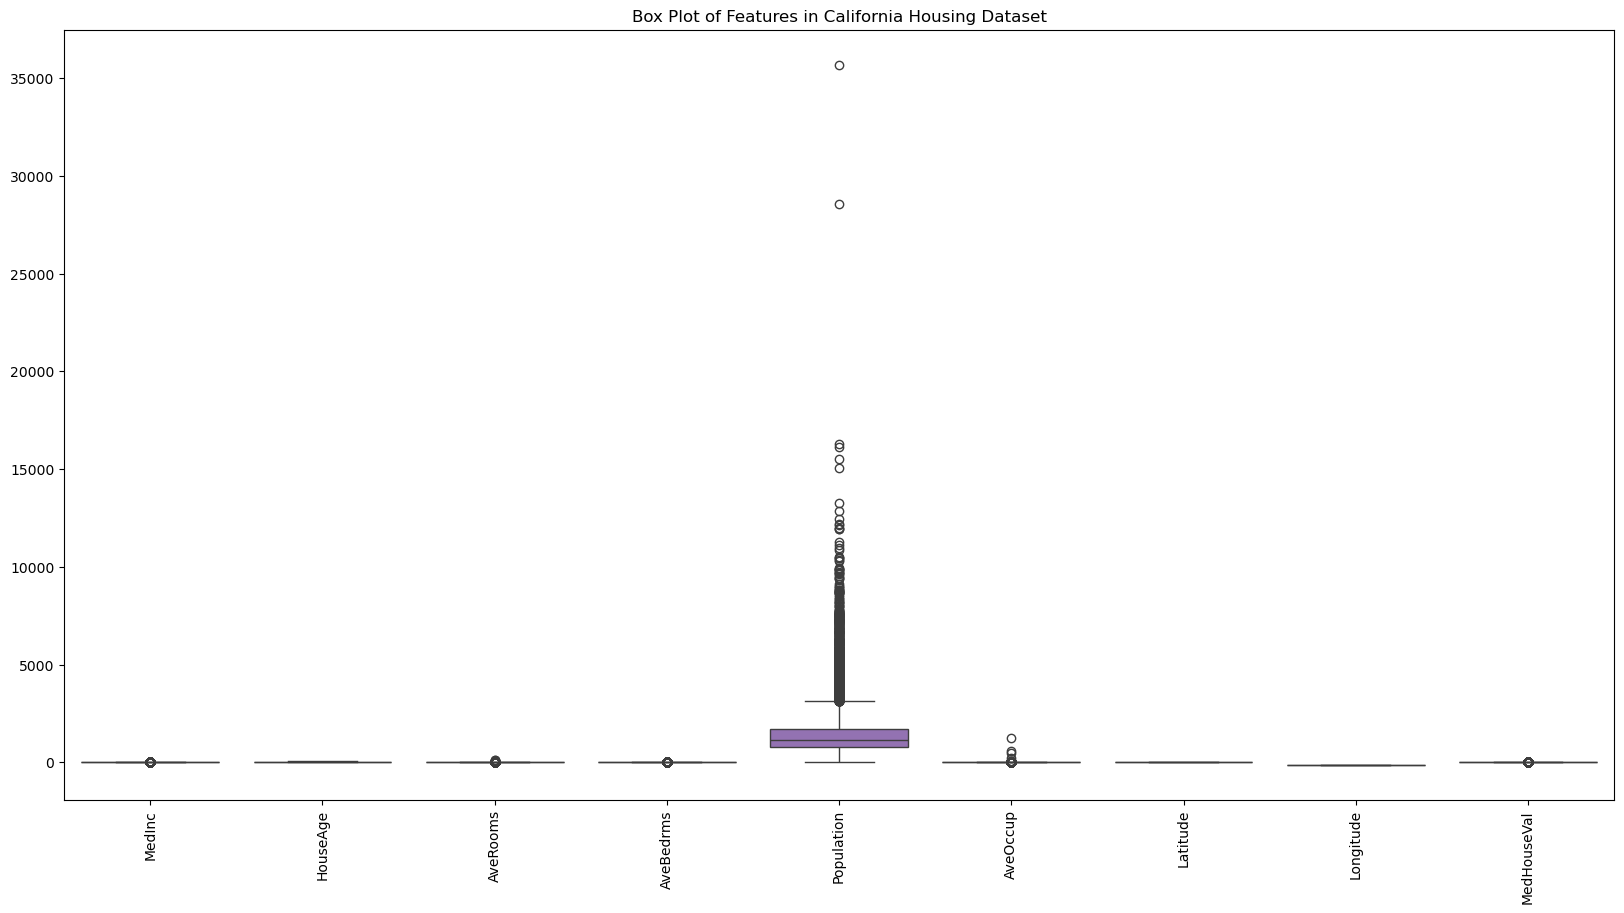

In [23]:
# Create box plots for each feature
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Box Plot of Features in California Housing Dataset")
plt.show()

In [27]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [31]:
print(df.shape)


(20640, 9)


In [ ]:
#To remove outliers from specific columns ('MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal'),
#we can use the Interquartile Range (IQR) method. Here’s the code:

In [33]:
# Define columns to check for outliers
columns_to_check = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']

# Calculate IQR and remove outliers
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Display the remaining data after outlier removal
print(df.shape)
print(df.head())


(16232, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   

   Longitude  MedHouseVal  
3    -122.25        3.413  
4    -122.25        3.422  
5    -122.25        2.697  
6    -122.25        2.992  
7    -122.25        2.414  


After Outlier Removal:

After removing the outliers, the dataset was reduced to 16,232 rows and 9 columns, as indicated by (16232, 9).

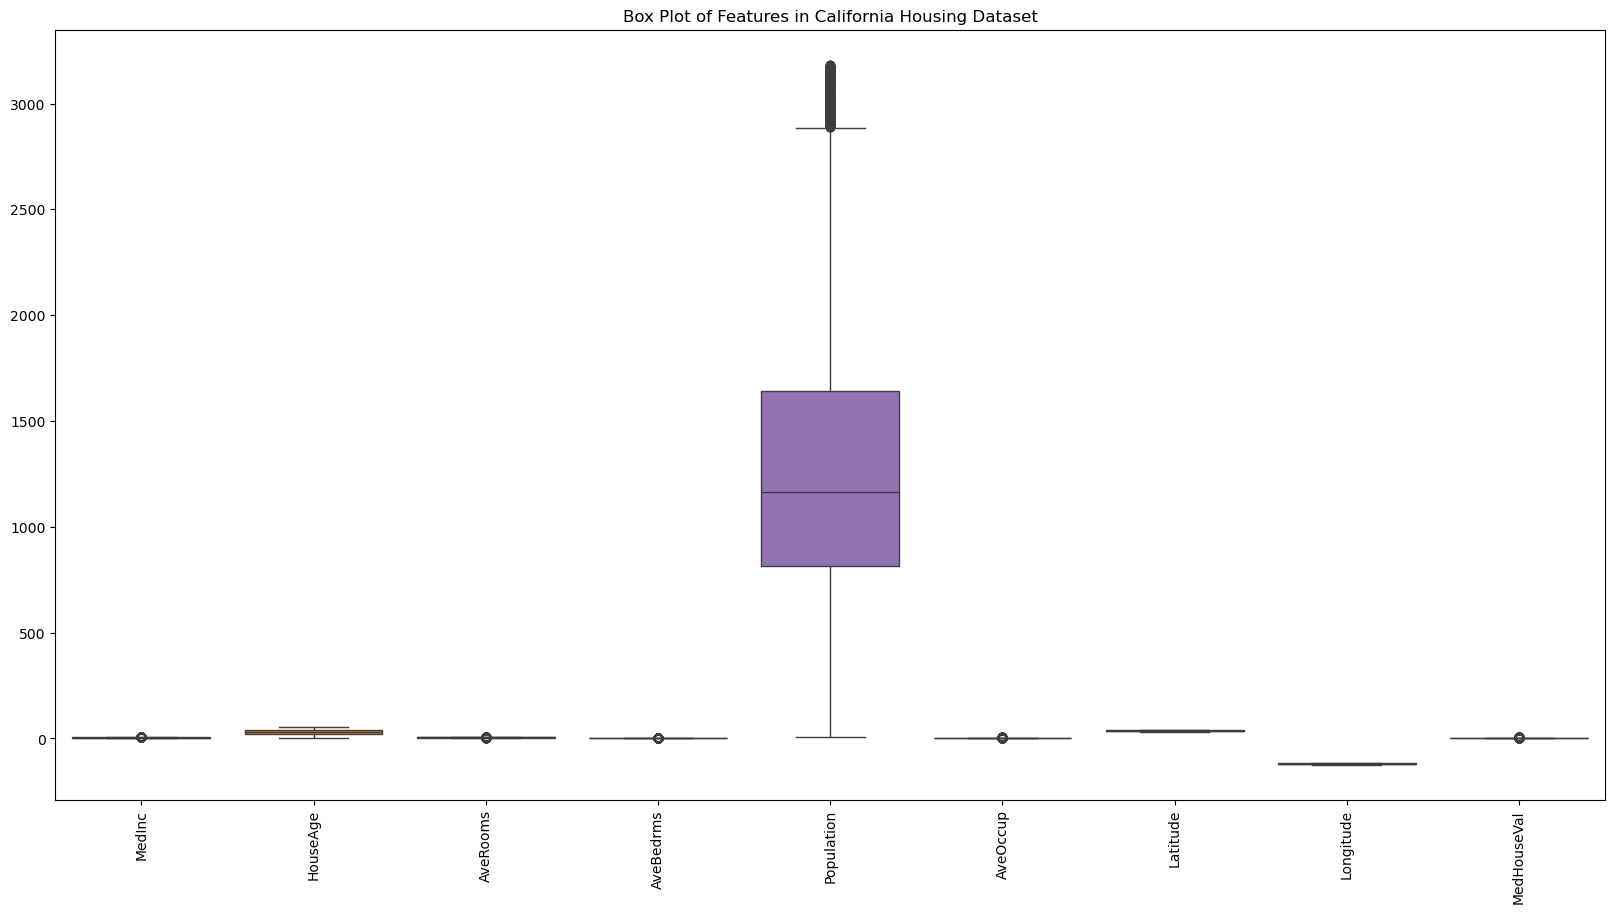

In [36]:
# Create box plots for each feature
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Box Plot of Features in California Housing Dataset")
plt.show()

In [38]:
# Check skewness for specified columns
skewness_values = df[columns_to_check].skew()

# Display skewness values
print(skewness_values)


MedInc         0.530420
AveRooms       0.096347
AveBedrms      0.220724
Population     0.740835
AveOccup       0.339774
MedHouseVal    0.669543
dtype: float64


most of the features have relatively low skewness, indicating a fairly symmetric distribution. Here's a summary of the skewness values:

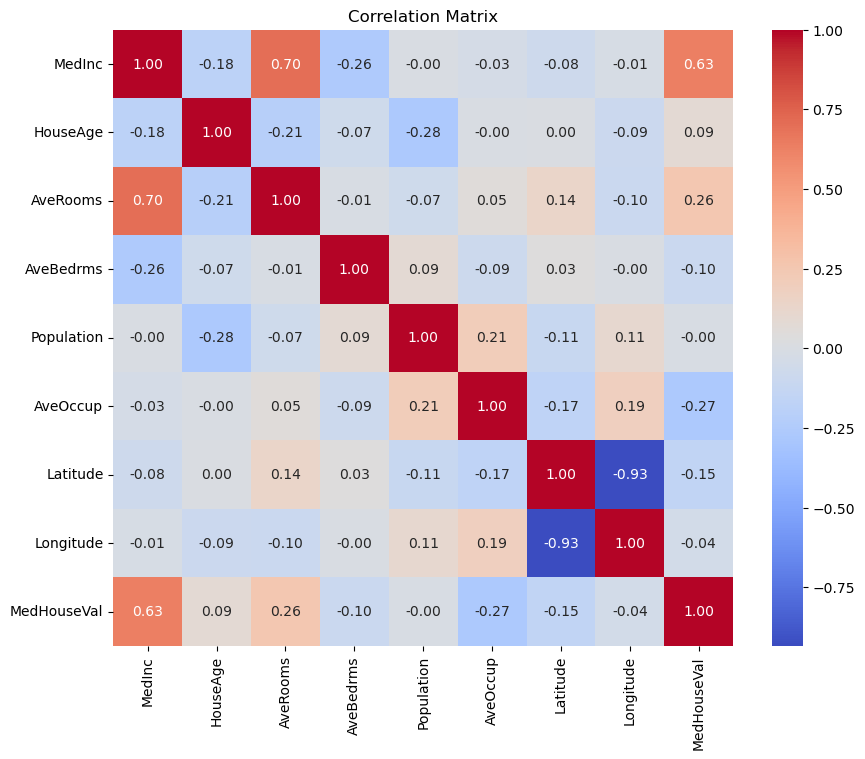

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [43]:
# Remove the 'Longitude' column
df = df.drop(columns=['Longitude'])

# Display the first few rows of the updated DataFrame
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   

   MedHouseVal  
3        3.413  
4        3.422  
5        2.697  
6        2.992  
7        2.414  


Typically, removing one of the highly correlated features can lead to a simpler and more interpretable model without sacrificing much predictive power.

In [52]:

# Print correlation values with 'MedHouseVal' sorted in descending order
correlation_with_target = df.corr()['MedHouseVal'].sort_values(ascending=False)
print(correlation_with_target)

MedHouseVal    1.000000
MedInc         0.630706
AveRooms       0.256783
HouseAge       0.085420
Population    -0.004531
AveBedrms     -0.099329
Latitude      -0.149929
AveOccup      -0.274968
Name: MedHouseVal, dtype: float64


In [56]:
# Define features and target variable
X = df[['MedInc', 'AveRooms', 'HouseAge', 'Population', 'AveBedrms', 'Latitude', 'AveOccup']]
y = df['MedHouseVal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.3621340930160185
R-squared: 0.567498948269767



Mean Squared Error (MSE): 0.3621340930160185 - This value represents the average squared difference between the actual and predicted values. Lower values indicate a better fit.

R-squared: 0.567498948269767 - This value represents the proportion of variance in the target variable that is explained by the model. Higher values (closer to 1) indicate a better fit.



In [63]:

# Define features and target variable
X = df[['MedInc', 'AveRooms', 'HouseAge', 'Population', 'AveBedrms', 'Latitude', 'AveOccup']]
y = df['MedHouseVal']

# Apply standard scaling to the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Select the top K features using SelectKBest
k = 5  # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X_scaled, y)

# Get the selected feature names
selected_feature_indices = selector.get_support(indices=True)
selected_features = [X.columns[i] for i in selected_feature_indices]
print("Selected Features:", selected_features)

# Split the selected scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Selected Features: ['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'AveOccup']
Mean Squared Error: 0.3904272888787564
R-squared: 0.5337080481489592


Comparison
When comparing these results with your previous results without scaling:

Without Scaling:

Mean Squared Error: 0.3621340930160185

R-squared: 0.567498948269767

After Scaling and Feature Selection:

Mean Squared Error: 0.3904272888787564

R-squared: 0.5337080481489592

Insights
The Mean Squared Error (MSE) slightly increased, and the R-squared value slightly decreased after scaling and feature selection. This indicates that scaling and feature selection did not significantly improve the model's performance in this case.